In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix

In [3]:
df = fetch_california_housing(as_frame = True)
df = df.frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
from sklearn.model_selection import StratifiedKFold

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.shape

(20640, 9)

In [9]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

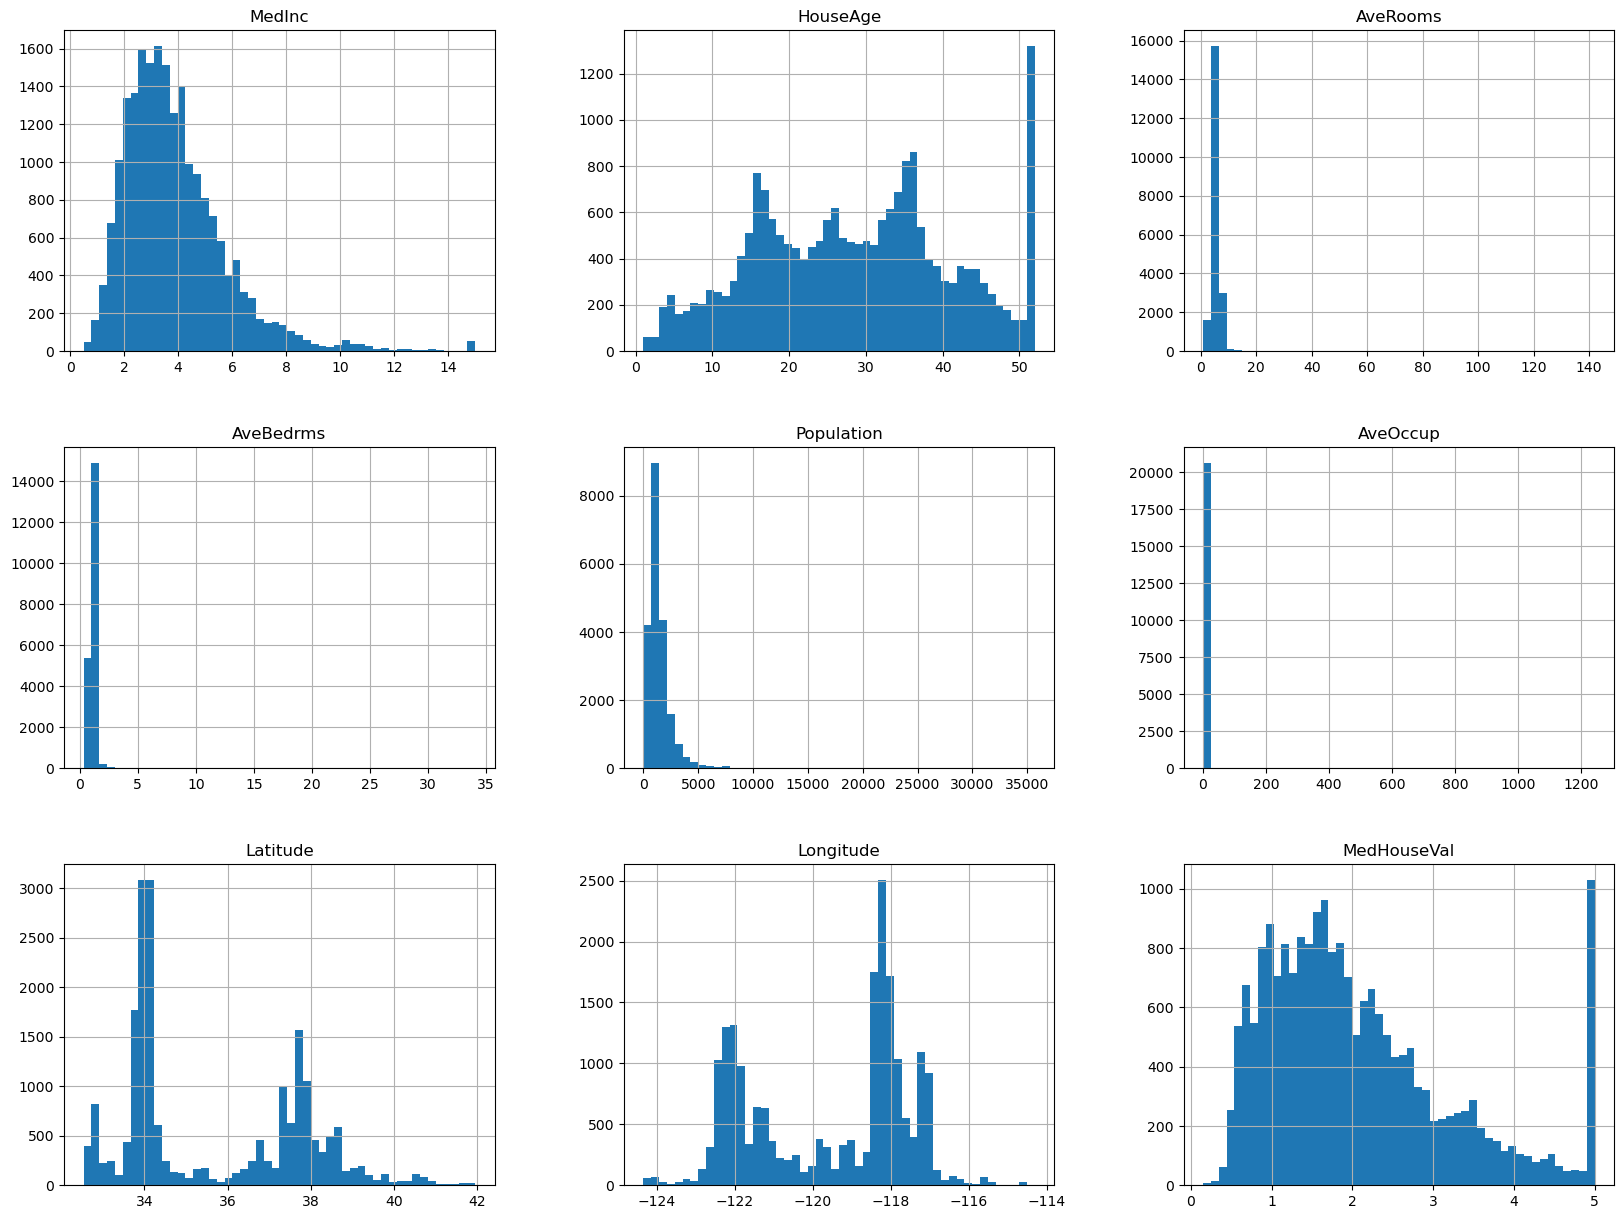

In [10]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>,
        <Axes: xlabel='MedHouseVal', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>,
        <Axes: xlabel='MedHouseVal', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', yl

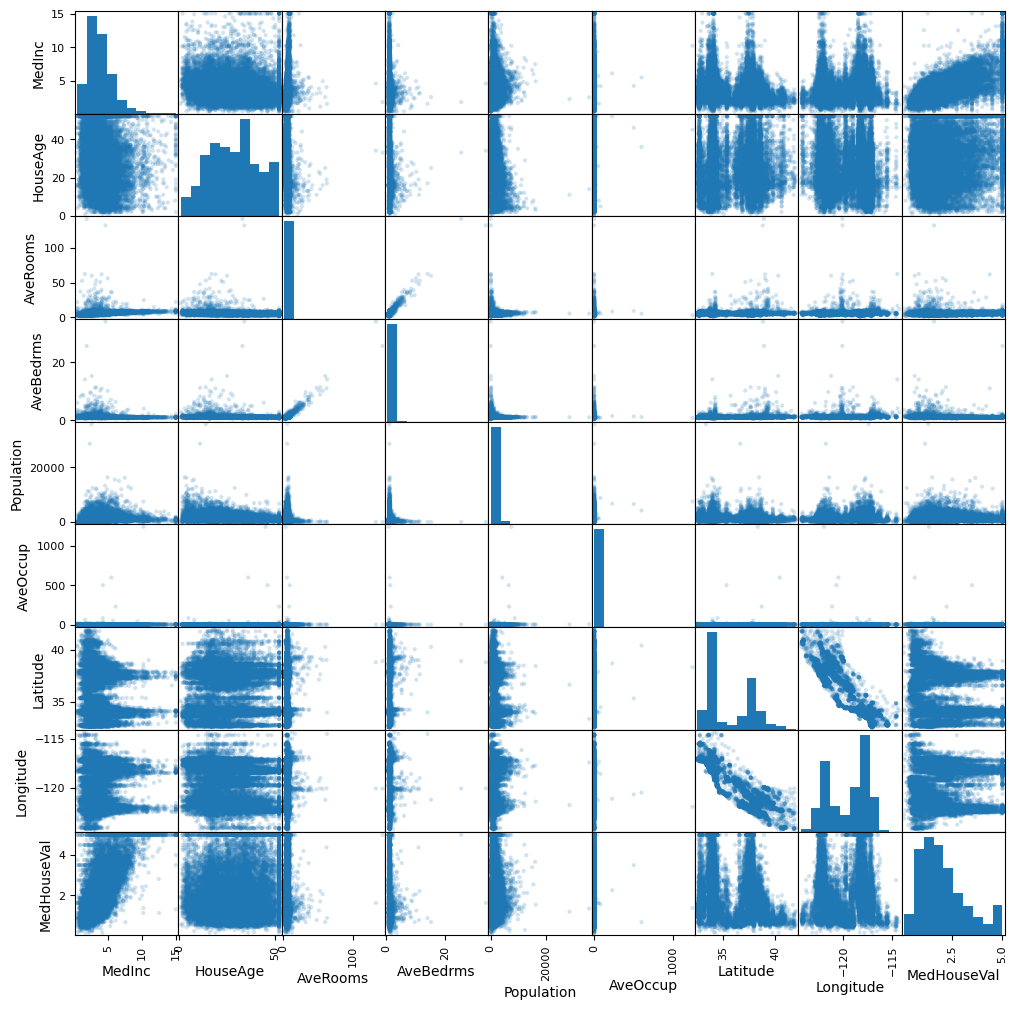

In [11]:
scatter_matrix(df,alpha=0.2, figsize = (12,12))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix.MedHouseVal.sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

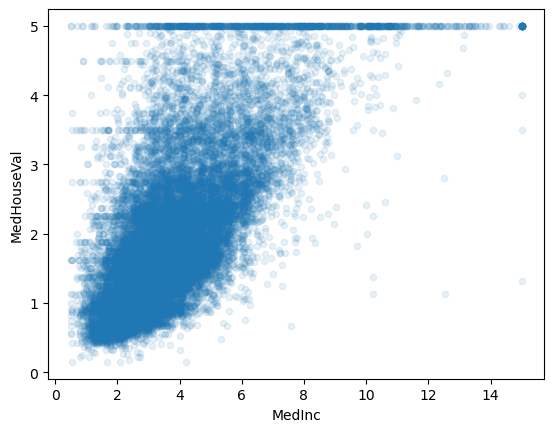

In [15]:
df.plot(kind = "scatter", x = "MedInc", y = "MedHouseVal", alpha = 0.1)

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [44]:
y_train

2048     0.895
7063     1.798
10931    1.832
8354     1.698
6700     4.904
         ...  
8417     1.523
5832     3.289
16865    2.154
13157    1.459
12636    0.680
Name: MedHouseVal, Length: 14448, dtype: float64

In [45]:
XG_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", GradientBoostingRegressor())
])

In [46]:
XG_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [47]:
XG_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [49]:
y_pred_xg = XG_pipeline.predict(X_test)
r2_score(y_test, y_pred_xg)

0.7987544824472367

In [50]:
regression_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

In [51]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [52]:
y_pred = regression_pipeline.predict(X_test)
r2_score(y_test, y_pred)

0.6262524847284605

In [53]:
from sklearn.linear_model import SGDRegressor

In [54]:
SGD_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SGDRegressor())
])

In [55]:
SGD_reg_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SGDRegressor())])

In [56]:
SGD_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SGDRegressor())])

In [57]:
y_pred_SGD = SGD_reg_pipeline.predict(X_test)
r2_score(y_test, y_pred_SGD) 

-1526316.4012930049

In [58]:
from sklearn.svm import SVR

In [59]:
SVR_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SVR())
])

In [60]:
SVR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', SVR())])

In [61]:
y_pred_SVR = SVR_pipeline.predict(X_test)
r2_score(y_test, y_pred_SVR)

0.745422144990278

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
print(cross_val_score(XG_pipeline, X, y, cv = 10)) #since this regressor is giving the best results

[0.33846097 0.72389709 0.70229918 0.68280128 0.77197724 0.64794431
 0.60696673 0.61847287 0.47440541 0.69015475]
